# Time Series Project
## CodeUp Data Science | April 2022

#### For this project you will be analyzing data from a superstore. The project is open ended and you can choose the direction you want to take it based on the paths outlined below.


<hr>

## SPEC:

#### __VP of Product:__ 

   - ##### Which product line should we expand?

   - ##### Is there a product category that is particularly profitable for us? Does one or another stand out in terms of sales volume? Does this vary by customer segment?



### Import libraries

In [303]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Stephen's files
import acquire 
import prepare
from acquire import get_superstore_data
from prepare import prepare_superstore_data

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# Import Stats library
import scipy.stats as stats

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

import warnings
warnings.filterwarnings('ignore')


# plotting defaults
plt.rc('figure', figsize=(16, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)


# Acquire Raw Data (from acquire.py)

In [304]:
# Call the acquire function directly

df = get_superstore_data()
df.head(1)

Reading csv file..


,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South


In [305]:
# Data Description

df.describe()

,Region ID,Category ID,Postal Code,Sales,Quantity,Discount,Profit
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,2.722607,8.106113,53501.926182,229.206358,3.794694,0.160110,21.880351
std,1.062277,3.480593,32180.245224,532.862614,2.297407,0.206419,202.891949
min,1.000000,1.000000,1841.000000,1.080000,1.000000,0.000000,-3839.990400
25%,2.000000,6.000000,19143.000000,16.695000,2.000000,0.000000,1.702400
50%,3.000000,8.000000,50315.000000,52.245000,3.000000,0.200000,8.073050
75%,4.000000,11.000000,85705.000000,209.917500,5.000000,0.200000,27.414450
max,4.000000,17.000000,98661.000000,8159.952000,14.000000,0.800000,3177.475000


In [306]:
# Check data format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region ID      1734 non-null   int64  
 1   Product ID     1734 non-null   object 
 2   Customer ID    1734 non-null   object 
 3   Category ID    1734 non-null   int64  
 4   Order ID       1734 non-null   object 
 5   Order Date     1734 non-null   object 
 6   Ship Date      1734 non-null   object 
 7   Ship Mode      1734 non-null   object 
 8   Segment        1734 non-null   object 
 9   Country        1734 non-null   object 
 10  City           1734 non-null   object 
 11  State          1734 non-null   object 
 12  Postal Code    1734 non-null   float64
 13  Sales          1734 non-null   float64
 14  Quantity       1734 non-null   float64
 15  Discount       1734 non-null   float64
 16  Profit         1734 non-null   float64
 17  Category       1734 non-null   object 
 18  Sub-Cate

# Prepare Data

In [328]:
df = prepare_superstore_data()
df.head(2)

Reading csv file..


,order_date,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub_category,customer_name,product_name,region_name,day,weekly,monthly
order_date,,,,,,,,,,,,,,,,,,,,
2014-01-04,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,4,1,1
2014-01-04,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.94,3.0,0.0,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",South,4,1,1


In [308]:
# Order & ship date ranges

print(f'Order Date: \n\t Min: {df.order_date.min()} Max: {df.order_date.max()}')
print(f'\nShip Date: \n\t Min: {df.ship_date.min()} Max: {df.ship_date.max()}')

Order Date: 
	 Min: 2014-01-04 00:00:00 Max: 2017-12-30 00:00:00

Ship Date: 
	 Min: 2014-01-08 00:00:00 Max: 2018-01-05 00:00:00


#### Check For nulls in entire DF

In [309]:
df.isna().any()

order_date       False
ship_date        False
ship_mode        False
segment          False
country          False
city             False
state            False
postal_code      False
sales            False
quantity         False
discount         False
profit           False
category         False
sub_category     False
customer_name    False
product_name     False
region_name      False
day              False
weekly           False
monthly          False
dtype: bool

### Initial Key Take-aways

- No need for __region_id, category_id column, order_id__  
- Should we need category_id, convert data type to int64
- Ship and order dates have varied end dates. 
- Df contains no nulls values 

# Exploration

## Initial questions?

- Which product(s) is most profitable and which are under-performing?
- What is the disparity in sales volumes?
- Is there variations in customer segments: 
    - Consumer ?
    - Corporate ?
    - Home Office?
- What category is the most and least profitable?
- How is the order date and ship dates play in any or all of these features?
    - Is shipping mode a factor to consider?
- Do regions disparity affect the sales volumes and profit margins?

## Split the data into train, validate, test (Human-based)

In [330]:
# Create a function to split data

train = df.loc['2014':'2015']
validate = df.loc['2016']
test = df.loc['2017']

# Train test shape
train.shape, validate.shape, test.shape

((712, 20), (526, 20), (496, 20))

- #### Train: 41.1% 
- #### Validate: 30.3%
- #### Test: 28.6%

### Verify Splits 

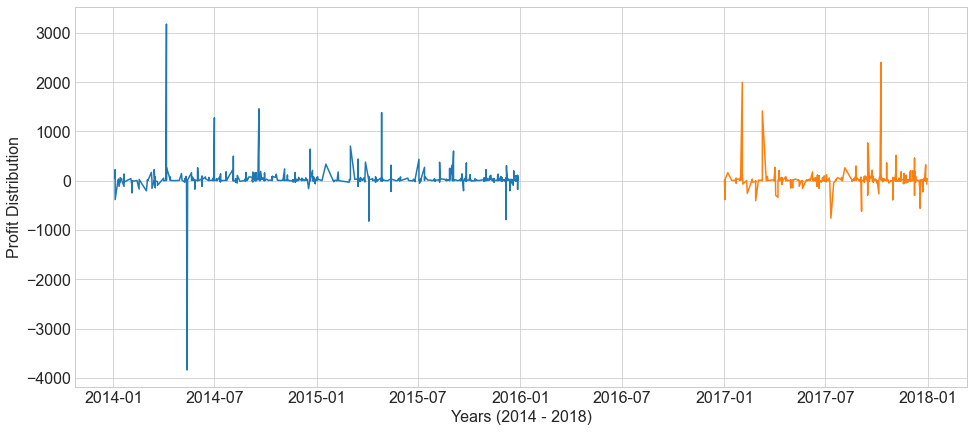

In [331]:
plt.plot(train.index, train.profit)
# plt.plot(validate.index, train.profit)
plt.plot(test.index, test.profit)
plt.xlabel('Years (2014 - 2018)')
plt.ylabel('Profit Distribution')
plt.show()

In [332]:
df.head(1)

,order_date,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub_category,customer_name,product_name,region_name,day,weekly,monthly
order_date,,,,,,,,,,,,,,,,,,,,
2014-01-04,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,4,1,1


### Set Target (Profit)

<AxesSubplot:title={'center':'Overall Profit Distribution Over Time'}, xlabel='order_date', ylabel='Profit'>

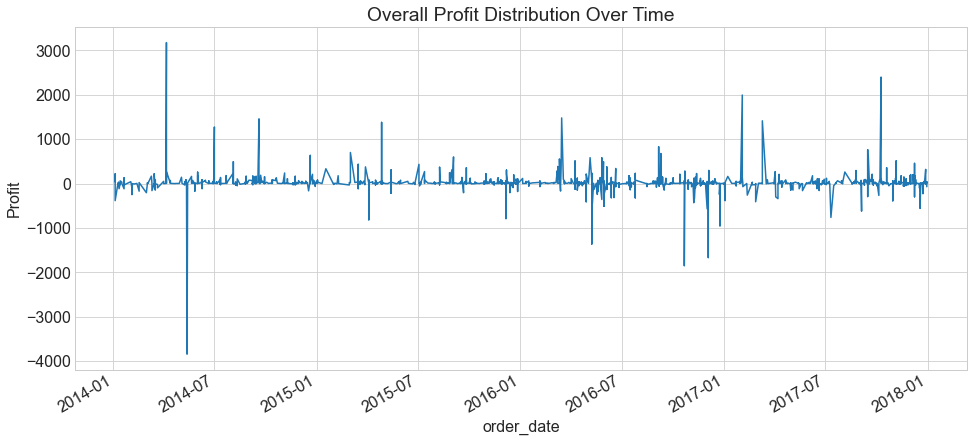

In [333]:
# Profit over time

y = df.profit

mean_profit = df.groupby(df.index.month).profit.mean().mean()
plt.xlabel('Order Dates')
plt.ylabel('Profit')
plt.title('Overall Profit Distribution Over Time')
y.plot()


### Profit 2014-2015 vs 2013

[Text(0.5, 1.0, 'Mean Profit Over Time')]

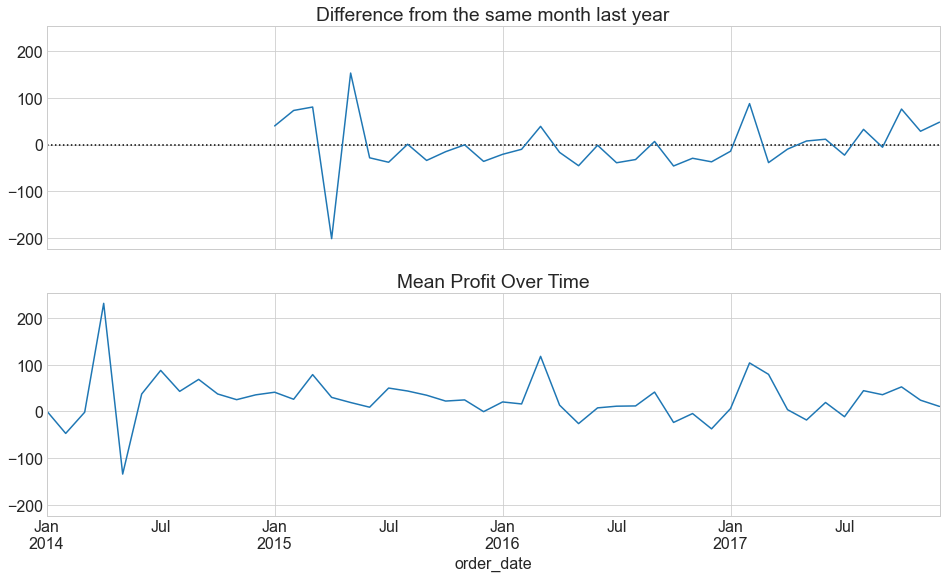

In [334]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (16, 9))

ax = y.resample('M').mean().diff(12).plot(ax = ax1)
ax1.hlines(0, *ax1.get_xlim(), color = 'black', ls = ':')
ax1.set(title = 'Difference from the same month last year')

y.resample('M').mean().plot(ax = ax2)
ax2.set(title = 'Mean Profit Over Time')

### Lag Plot Profit Prediction

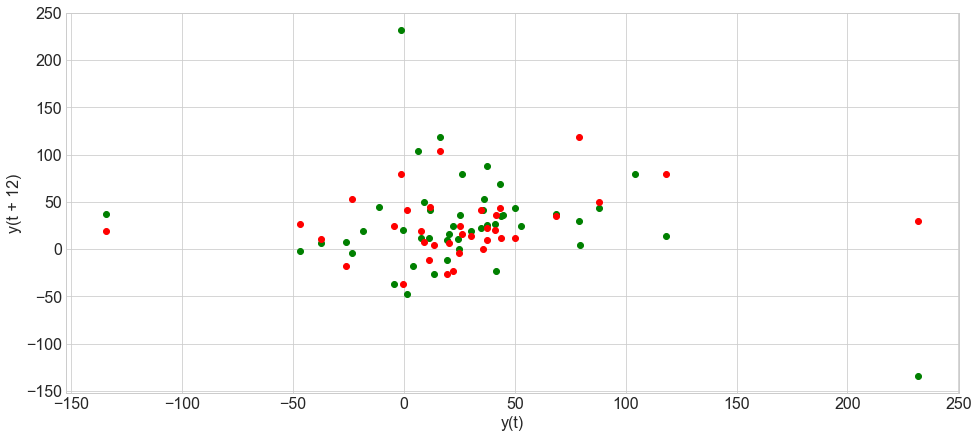

In [335]:
# Lag Plot

ax1 = pd.plotting.lag_plot(df.profit.resample('M').mean(),  c = 'green')
ax1.set(label = ('Current'))
ax2 = pd.plotting.lag_plot(df.profit.resample('M').mean(), lag = 12, c = 'red')

### Autocorrelation Profit

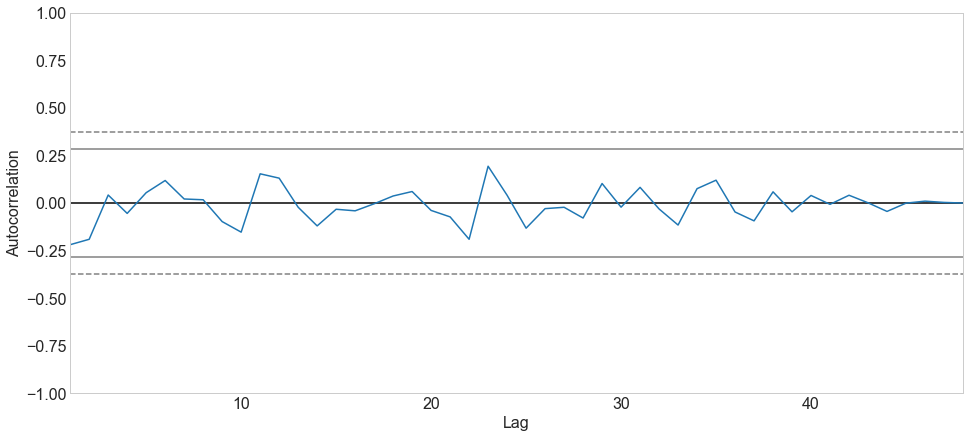

In [337]:
pd.plotting.autocorrelation_plot(df.profit.resample('M').mean())
None

## <u>Product Categories vs Profit</u>

## (i) Is there a product category that is particularly profitable for us? 

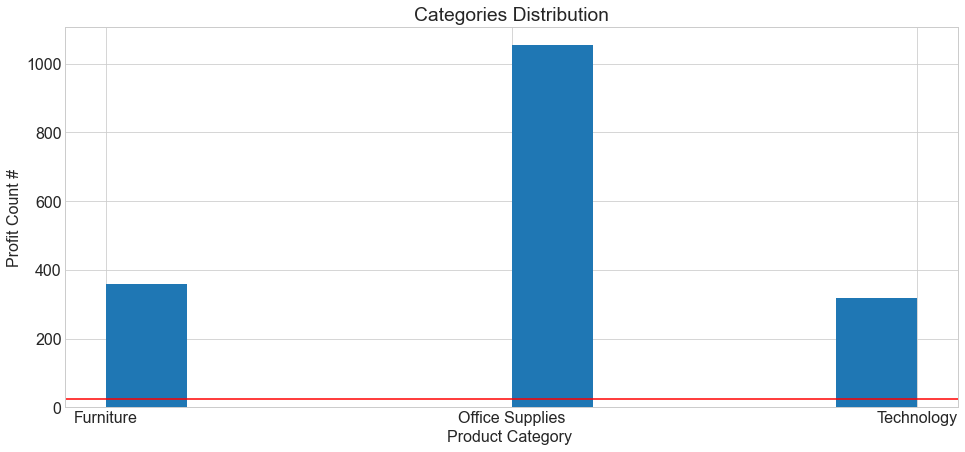

In [338]:
#  Product Categories
mean_profit = df.groupby(df.index.month).profit.mean().mean()
df.category.hist()
plt.axhline(mean_profit, color="r")
plt.title('Categories Distribution')
plt.xlabel('Product Category ')
plt.ylabel('Profit Count #')
plt.show()

### Monthly Mean Profit Distribution by Category

In [396]:
mean_profit = df.groupby(df.index).profit.mean()
mean_profit.mean()

20.6442585711277

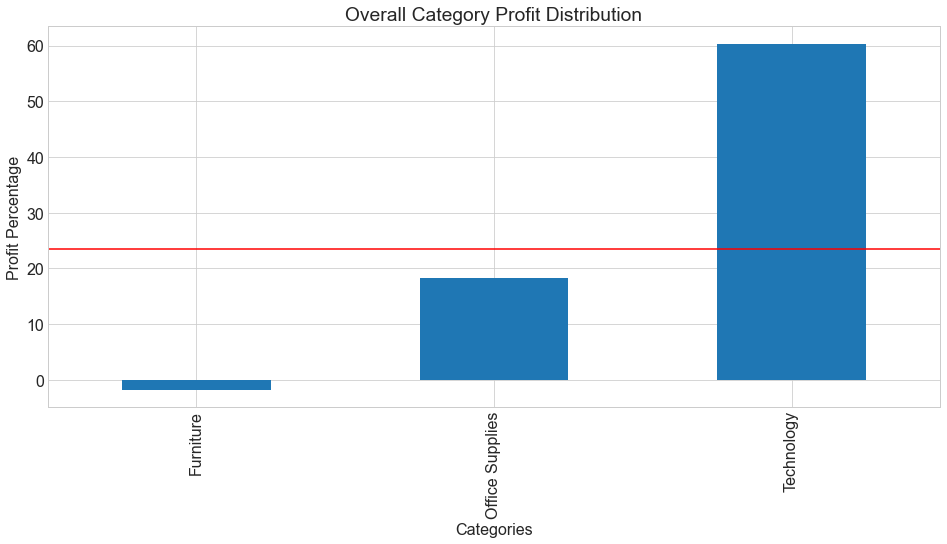

In [398]:
# Mean monthly profit by 

mean_profit = df.groupby(df.index.month).profit.mean().mean()
df.groupby('category').profit.mean().plot.bar()
plt.axhline(mean_profit, color="r")
plt.title('Overall Category Profit Distribution')
plt.xlabel('Categories')
plt.ylabel('Profit Percentage')

plt.show()

In [345]:
furniture_profit = df[df.category == 'Furniture'].profit
office_supply_profit = df[df.category == 'Office Supplies'].profit
technology_profit = df[df.category == 'Technology'].profit
print(f'Furniture: {furniture_profit.mean()} \nOffice Suppply: {office_supply_profit.mean()} \nTechnology: {technology_profit.mean()}')


Furniture: -1.7312363888888964 
Office Suppply: 18.305620568720364 
Technology: 60.34904294670841


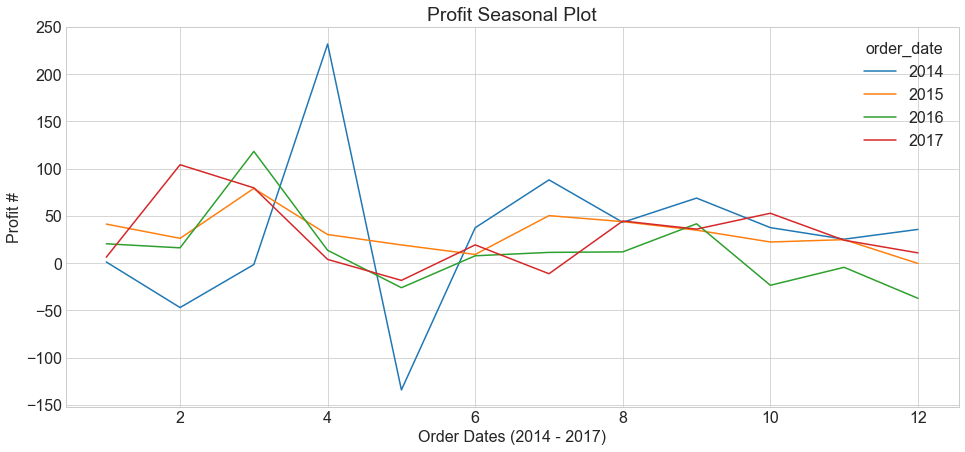

In [400]:
# Profit variations over time

y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Profit Seasonal Plot')
plt.xlabel('Order Dates (2014 - 2017)')
plt.ylabel('Profit #')
plt.show()

### Monthly Categories Profit Over Time

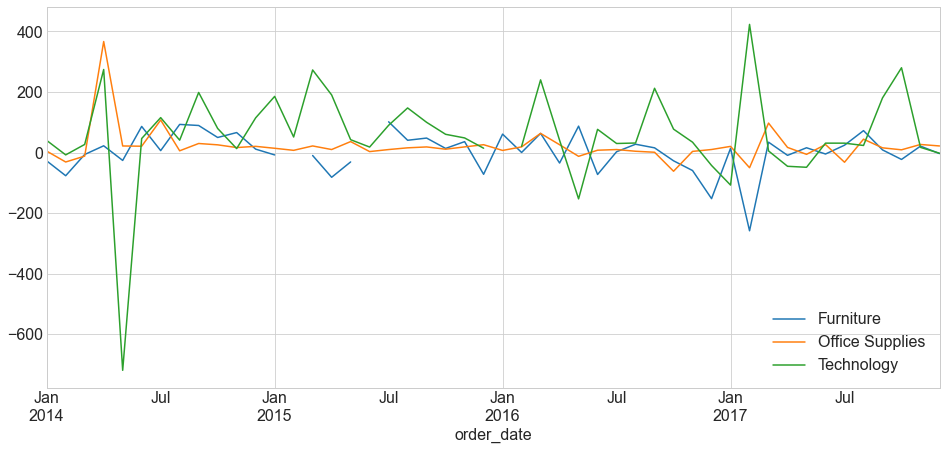

In [407]:
# Profit of categories over time 

for cat in df.category.unique():
    sample = df[df.category == cat]
    sample.resample('M').profit.mean().plot(label = cat)
    plt.legend()
    

### Most profitable category

In [435]:
group = df.groupby(["category"]).mean()
total_price = group["profit"].groupby(level = 0, group_keys = False)
total_price.nlargest(5)

category
Furniture          -1.731236
Office Supplies    18.305621
Technology         60.349043
Name: profit, dtype: float64

In [436]:
df.category.value_counts()

Office Supplies    1055
Furniture           360
Technology          319
Name: category, dtype: int64

### T-Test (One Sample) Product Category vs Overall Profit

In [437]:
# Set alpha 
alpha = 0.05

HO = 'The mean  profit of categories = overall mean profit of all customers'
H1 = 'The mean  profit of categories > overall mean profit of all customers'


# Compute overall profit mean
overall_profit_mean = df.profit.mean()

for cat in df.category.unique():
    
    cat_profit = df[df.category == cat]
    
    t, p = stats.ttest_1samp(sub_cat_profit.profit, overall_profit_mean)
   
    if (p/2) > alpha:
        print(f"FAILED REJECT HO: -|- {cat} -|-- {HO}")
    elif t < 0:
        print(f"FAILED REJECT HO: -|- {cat} -|-- {HO}")
    else:
        print(f"REJECT HO: -|- {cat} -|-- {HO}")

REJECT HO: -|- Furniture -|-- The mean  profit of categories = overall mean profit of all customers
REJECT HO: -|- Office Supplies -|-- The mean  profit of categories = overall mean profit of all customers
REJECT HO: -|- Technology -|-- The mean  profit of categories = overall mean profit of all customers


### (ii) Which category has most sales by volume (quantity)?

In [438]:
df.quantity.unique()

array([ 2.,  3.,  5.,  8.,  1.,  7.,  4.,  6.,  9., 14., 13., 10., 12.,
       11.])

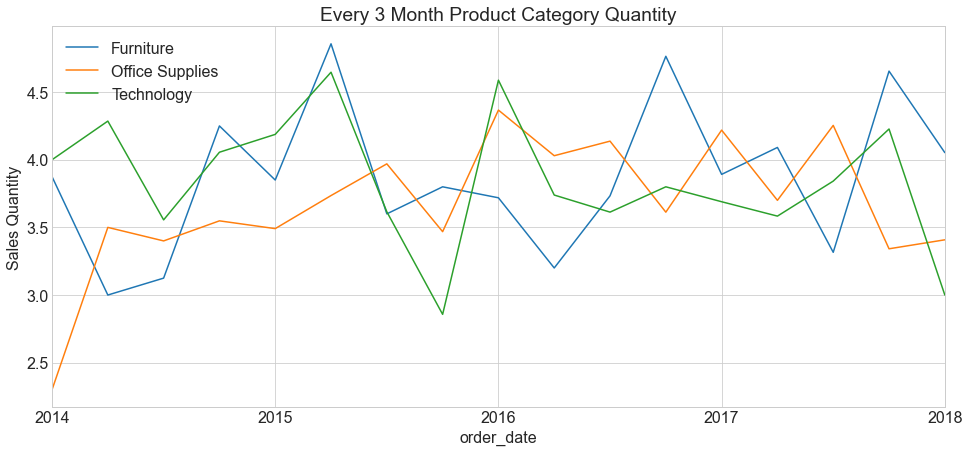

In [439]:
# Profit of categories over time 

for cat in df.category.unique():
    sample = df[df.category == cat]
    sample.resample('3M').quantity.mean().plot(label = cat)
    plt.title('Every 3 Month Product Category Quantity')
    plt.ylabel('Sales Quantity')
    plt.legend()

In [440]:
group = df.groupby(["category"]).mean()
total_price = group["quantity"].groupby(level = 0, group_keys = False)
total_price.nlargest(5)

category
Furniture          3.891667
Office Supplies    3.766825
Technology         3.777429
Name: quantity, dtype: float64

In [441]:
# Set alpha 
alpha = 0.05

HO = 'The mean  profit of categories = overall mean profit of all customers'
H1 = 'The mean  profit of categories > overall mean profit of all customers'


# Compute overall profit mean
overall_profit_mean = df.profit.mean()

for cat in df.category.unique():
    
    cat_profit = df[df.sub_category == cat]
    
    t, p = stats.ttest_1samp(sub_cat_profit.profit, overall_profit_mean)
   
    if (p/2) > alpha:
        print(f"FAILED REJECT HO: -|- {cat} -|-- {HO}")
    elif t < 0:
        print(f"FAILED REJECT HO: -|- {cat} -|-- {HO}")
    else:
        print(f"REJECT HO: -|- {cat} -|-- {HO}")

REJECT HO: -|- Furniture -|-- The mean  profit of categories = overall mean profit of all customers
REJECT HO: -|- Office Supplies -|-- The mean  profit of categories = overall mean profit of all customers
REJECT HO: -|- Technology -|-- The mean  profit of categories = overall mean profit of all customers


### Take aways (category):

#### Profit vs Category
- Technology - most profitable (0ver 60%)
- Office Supplies - about 18% profitable
- Furnitures - Making loss

#### Quantity vs Category
- Furniture is the most sold item by quantity 
- Technology 2nd most sold items
- Office supply 3rd

## <u>Sub-Category vs Profit</u>
### (iii). Which sub-category are the most profitable?

In [353]:
# Get sub categories

df.sub_category.unique()

array(['Bookcases', 'Chairs', 'Tables', 'Storage', 'Paper', 'Furnishings',
       'Appliances', 'Binders', 'Envelopes', 'Accessories', 'Phones',
       'Art', 'Supplies', 'Labels', 'Fasteners', 'Machines', 'Copiers'],
      dtype=object)

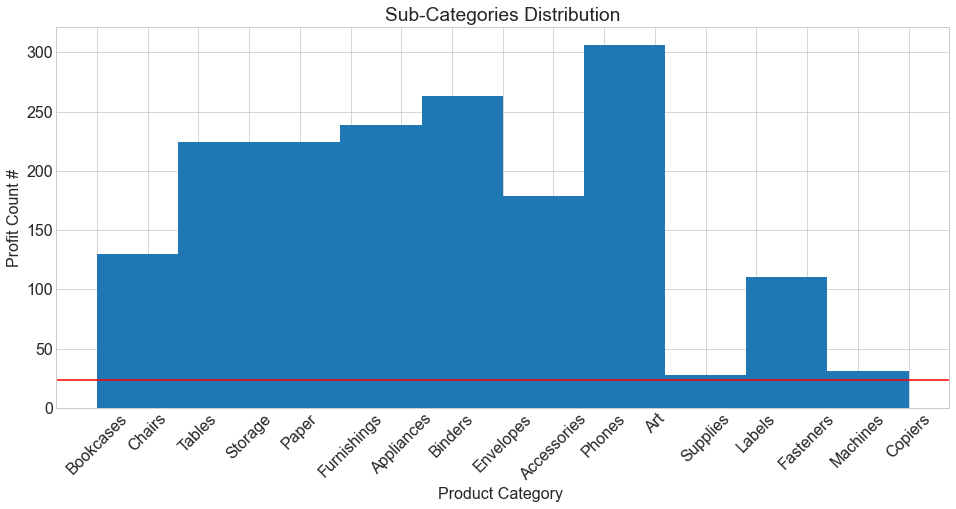

In [355]:
#  Product Categories
mean_profit = df.groupby(df.index.month).profit.mean().mean()
df.sub_category.hist()
plt.axhline(mean_profit, color="r")
plt.title('Sub-Categories Distribution')
plt.xlabel('Product Category ')
plt.ylabel('Profit Count #')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()

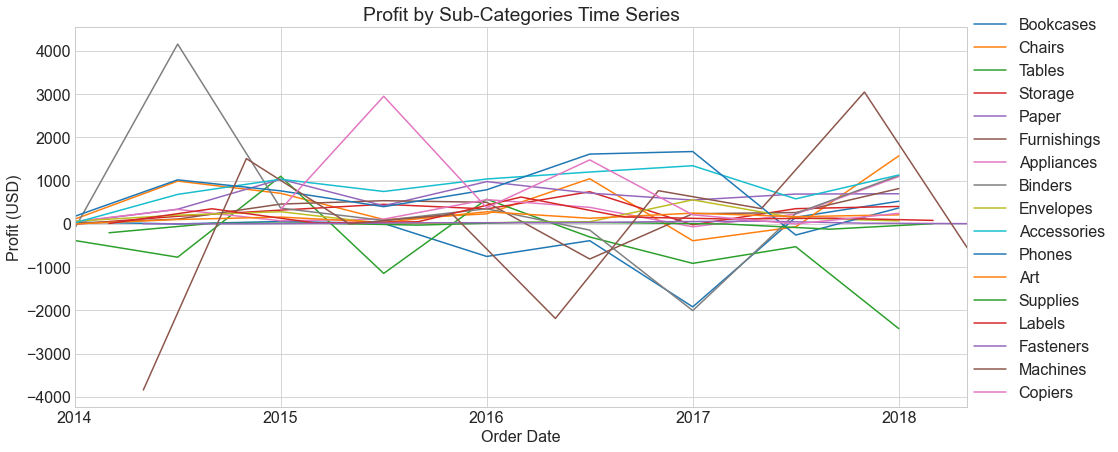

In [372]:
# Sub-category profit every 6 months 

for cat in df.sub_category.unique():
    sample = df[df.sub_category == cat]
    sample.resample('6M').profit.sum().plot(label = cat)
    plt.title('Profit by Sub-Categories Time Series')
    plt.ylabel('Profit (USD)')
    plt.xlabel('Order Date')
    plt.legend(loc = (1.0, 0.0))

### One Sample T-test - sub-categories vs Profit

#### Which is the most profitable sub-categories?


In [457]:
# Category value counts
df.sub_category.value_counts()

Binders        263
Paper          224
Furnishings    168
Storage        162
Phones         157
Art            149
Accessories    131
Chairs          95
Appliances      71
Labels          67
Tables          62
Envelopes       48
Fasteners       43
Bookcases       35
Supplies        28
Machines        21
Copiers         10
Name: sub_category, dtype: int64

In [375]:
# Set alpha 
alpha = 0.05

HO =  'Mean sub-category profits = Mean profit of all customers'
H1 = 'Mean sub-category profits > Mean profit of all customers'

# Compute overall profit mean
overall_profit_mean = df.profit.mean()

for cat in df.sub_category.unique():
    sub_cat_profit = df[df.sub_category == cat]
    sub_cat_len = len(sub_cat_profit)
    if sub_cat_len > 30:
        t, p = stats.ttest_1samp(sub_cat_profit.profit, overall_profit_mean)
    else:
        t, p = stats.wilcoxon(sub_cat_profit.profit)

    if (p/2) > alpha:
        print(f"FAILED REJECT: -|- {cat} -|-- {HO}")
    elif t < 0:
        print(f"FAILED REJECT: -|- {cat} -|--{HO}")
    else:
        print(f"REJECT: -|- {cat} -|--{HO}")

FAILED REJECT: -|- Bookcases -|-- Mean sub-category profits = Mean profit of all customers
REJECT: -|- Chairs -|--Mean sub-category profits = Mean profit of all customers
FAILED REJECT: -|- Tables -|--Mean sub-category profits = Mean profit of all customers
FAILED REJECT: -|- Storage -|-- Mean sub-category profits = Mean profit of all customers
FAILED REJECT: -|- Paper -|-- Mean sub-category profits = Mean profit of all customers
FAILED REJECT: -|- Furnishings -|--Mean sub-category profits = Mean profit of all customers
FAILED REJECT: -|- Appliances -|-- Mean sub-category profits = Mean profit of all customers
FAILED REJECT: -|- Binders -|-- Mean sub-category profits = Mean profit of all customers
FAILED REJECT: -|- Envelopes -|-- Mean sub-category profits = Mean profit of all customers
REJECT: -|- Accessories -|--Mean sub-category profits = Mean profit of all customers
REJECT: -|- Phones -|--Mean sub-category profits = Mean profit of all customers
FAILED REJECT: -|- Art -|--Mean sub-c

### Most Profitable Subcategories 

In [378]:
# Sub df with profitable sub-categories 
profit_sub_cat = df[(df.sub_category == 'Chairs') | 
                       (df.sub_category == 'Phones') |
                       (df.sub_category == 'Copiers') |
                       (df.sub_category == 'Accessories')
                      ]

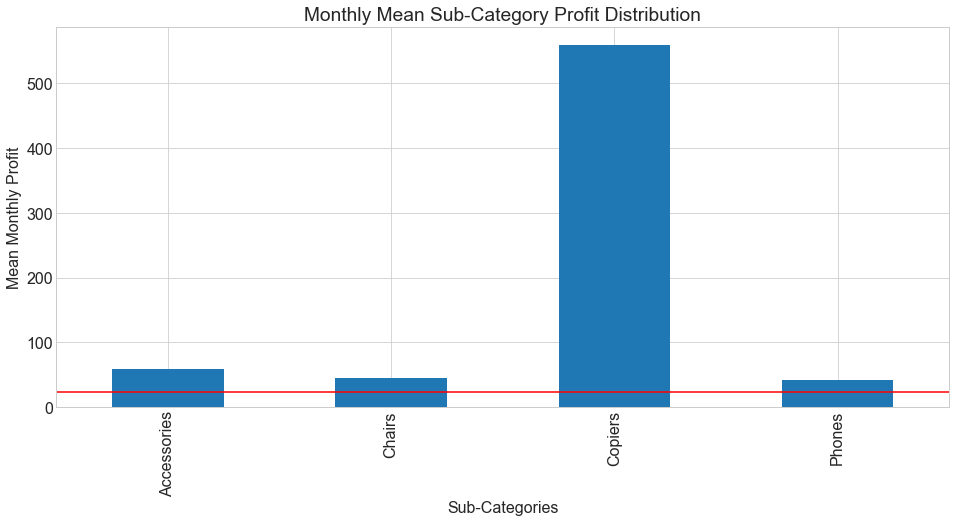

In [379]:
# Mean monthly profit by 

mean_profit = df.groupby(df.index.month).profit.mean().mean()
profit_sub_cat.groupby('sub_category').profit.mean().plot.bar()
plt.axhline(mean_profit, color="r")
plt.title('Monthly Mean Sub-Category Profit Distribution')
plt.xlabel('Sub-Categories')
plt.ylabel('Mean Monthly Profit')

plt.show()

### (iv) Which sub-category has most sales by volume?




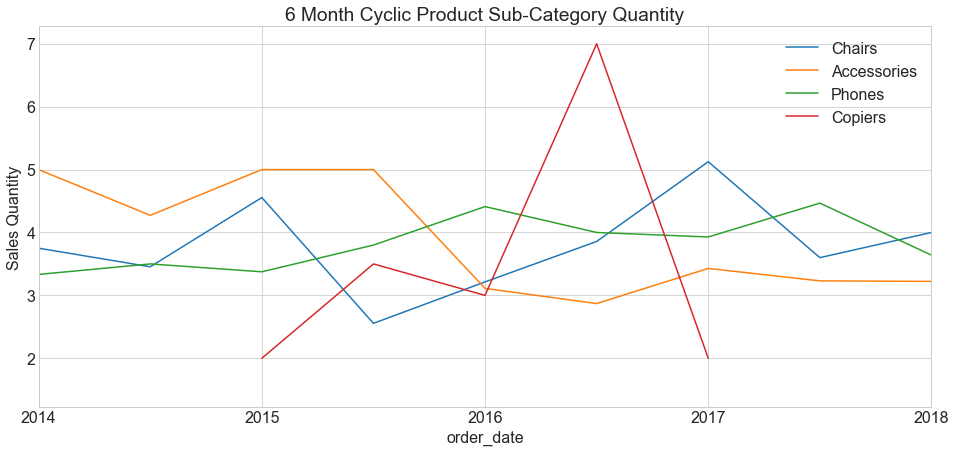

In [455]:
# Profit of categories over time 

for cat in profit_sub_cat.sub_category.unique():
    sample = profit_sub_cat[profit_sub_cat.sub_category == cat]
    sample.resample('6M').quantity.mean().plot(label = cat)
    plt.title('6 Month Cyclic Product Sub-Category Quantity')
    plt.ylabel('Sales Quantity')
    plt.legend(loc = (1.0, 0.0))
    plt.legend()

In [466]:
# Sub category sales quantity mean

group = df.groupby(["sub_category"]).mean()
total_price = group["quantity"].groupby(level = 0, group_keys = False)
total_price.nlargest()

sub_category
Accessories    3.633588
Appliances     3.873239
Art            3.711409
Binders        3.828897
Bookcases      3.600000
Chairs         3.873684
Copiers        3.100000
Envelopes      3.625000
Fasteners      4.674419
Furnishings    3.666667
Labels         3.850746
Machines       4.190476
Paper          3.674107
Phones         3.885350
Storage        3.604938
Supplies       3.535714
Tables         4.693548
Name: quantity, dtype: float64

### T-Test (One Sample) - Sub-category vs Sales Quantity

In [485]:

# Set alpha 
alpha = 0.05

HO =  'Mean sub-category quantity = overall Mean quantity'
H1 = 'Mean sub-category quantity > overall Mean quantity'

# Compute overall profit mean
overall_quantity_mean = df.quantity.mean()

for cat in df.sub_category.unique():
    sub_cat_quantity = df[df.sub_category == cat]
    sub_cat_len = len(sub_cat_profit)
    if sub_cat_len > 30:
        t, p = stats.ttest_1samp(sub_cat_quantity.quantity, overall_quantity_mean)
    else:
        t, p = stats.wilcoxon(sub_cat_profit.quantity)

    if (p/2) > alpha:
        print(f"FAILED REJECT HO: -|- {cat} -|-- {HO}")
    elif t < 0:
        print(f"FAILED REJECT HO: -|- {cat} -|--{HO}")
    else:
        print(f"REJECT HO: -|- {cat} -|--{HO}")

REJECT HO: -|- Bookcases -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Chairs -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Tables -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Storage -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Paper -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Furnishings -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Appliances -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Binders -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Envelopes -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Accessories -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Phones -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Art -|--Mean sub-category quantity = overall Mean quantity
REJECT HO: -|- Supplies -|--Mean sub-category quantity = o

#### Take-Away: Sales Quantity vs Sub_category 

- All items sold were above sales means

### (v). How does profit vary through years with profitable subcategories?

### Take Aways:- Most Profitable Sub-categories (greater than overall mean)
- Accessories (#2 profitable)
- Phones (#4 profitable)
- Chairs (#3 profitable)
- Copiers (#1 Most profitable)


#### What are our products of interest?

#### Explore Profit 

## MVP - Categories

# Modeling 